In [1]:
from IPython.display import clear_output
import rebound
import matplotlib.pyplot as plt
import numpy as np

In [3]:
sim = rebound.Simulation()
sim.add("Sun")
sim.add("Mars")
print(sim.particles[1])

Searching NASA Horizons for 'Sun'... 
Found: Sun (10) 
Searching NASA Horizons for 'Mars'... 
Found: Mars Barycenter (4) (chosen from query 'Mars')
<rebound.particle.Particle object at 0x7f1ed57f7dc0, m=3.2271560828978514e-07 x=-0.5492436655306603 y=-1.3999284722751524 z=-0.015967839038202643 vx=0.7894935174984095 vy=-0.2231144229610575 vz=-0.02402804944230848>


In [13]:
sim = rebound.Simulation()
#sim.units = ('AU', 'yr', 'Msun')
sim.add(m=1)
# add mars
sim.add(m=3.2271560828978514e-07, a= 1.524, omega = np.pi)
# add jupiter
sim.add(m=0.0009547919099366768, x=4.700873257350307, y=-1.638871658756794, z=-0.09837100227914734, vx=0.1391574941369194, vy=0.4348006080824522, vz=-0.004917193679728236)

sim.move_to_com()
sim.integrator = "whfast"
sim.dt = .01

# create astroid
mass = 1e-28
radius = 2.502
#radius = 3.1
omega =(0.5*np.pi)
ecc = 0.2

sim.add(m=mass,a=radius,omega=omega, e=ecc)

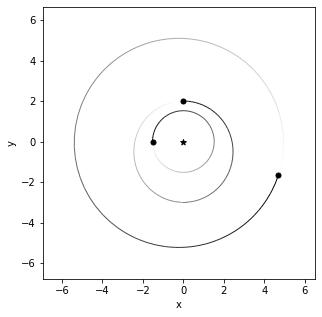

In [14]:
fig = rebound.OrbitPlot(sim)

In [15]:
a_list = []
i_list = []
for i in np.arange (100000.):
    sim.integrate(i*2.*np.pi)
    i_list.append(i*2.*np.pi)
    a_list.append(sim.particles[3].a)


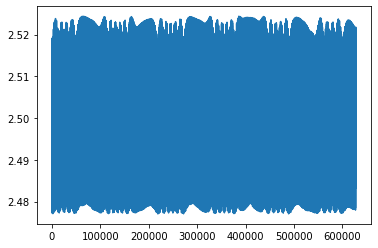

2.501852108144571


In [16]:
plt.plot(i_list,a_list)
plt.show()
print(sum(a_list)/len(a_list))

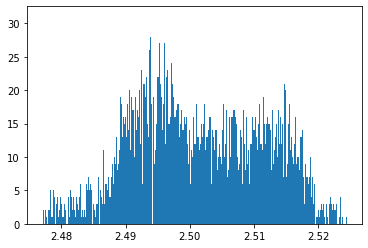

In [19]:
plt.hist(a_list,bins=10000)
plt.show()